## Main Goals: 
Conduct EDA on our cleaned job data to 
- build data profile tables and plots  
- explore data relationships  
- identify features

## 1. Imports packages and load the data

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
jobs = pd.read_csv('data/job_data_cleaned.csv')

In [7]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2088 entries, 0 to 2087
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Description    2088 non-null   object 
 1   Rating             1980 non-null   float64
 2   Company Name       2088 non-null   object 
 3   Location           2088 non-null   object 
 4   Size               2047 non-null   object 
 5   Type of ownership  2073 non-null   object 
 6   Industry           1899 non-null   object 
 7   Sector             1899 non-null   object 
 8   Revenue            1474 non-null   object 
 9   Years Founded      1592 non-null   float64
 10  Min_Salary         2088 non-null   int64  
 11  Max_Salary         2088 non-null   int64  
 12  Seniority          2088 non-null   object 
 13  HQ_Same            2088 non-null   int64  
 14  SQL                2088 non-null   int64  
 15  Excel              2088 non-null   int64  
 16  Python             2088 

In [8]:
jobs.head(3)

,Job Description,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Revenue,Years Founded,Min_Salary,Max_Salary,Seniority,HQ_Same,SQL,Excel,Python,Tableau,R,SAS
0,"['ARE', 'YOU', 'EAGER', 'TO', 'ROLL', 'UP', 'Y...",3.2,Vera Institute of Justice,NY,201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),59.0,37,66,Not specified,1,1,0,1,0,1,0
1,"['OVERVIEW', 'PROVIDES', 'ANALYTICAL', 'AND', ...",3.8,Visiting Nurse Service of New York,NY,10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),127.0,37,66,Not specified,1,1,1,0,0,1,1
2,"['WERE', 'LOOKING', 'FOR', 'A', 'SENIOR', 'DAT...",3.4,Squarespace,NY,1001 to 5000 employees,Company - Private,Internet,Information Technology,NaN,17.0,37,66,Senior,1,1,1,0,1,0,0


## 2. Explore the data

### 2.1 DATA PROFILES — PLOTS AND TABLES

#### Numerical features

Let's first see the summary table for our numerical features.

In [9]:
jobs.describe()

,Rating,Years Founded,Min_Salary,Max_Salary,HQ_Same,SQL,Excel,Python,Tableau,R,SAS
count,1980.000000,1592.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000,2088.000000
mean,3.731566,41.534548,54.172414,89.875479,0.453065,0.588123,0.394157,0.270115,0.268678,0.175287,0.147510
std,0.670333,47.334203,19.545825,29.410448,0.497911,0.492291,0.488786,0.444125,0.443378,0.380304,0.354698
min,1.000000,1.000000,24.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.300000,14.000000,41.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.700000,23.000000,50.000000,87.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.100000,50.000000,63.000000,104.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,5.000000,322.000000,113.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


And let's see what the distributions look like.

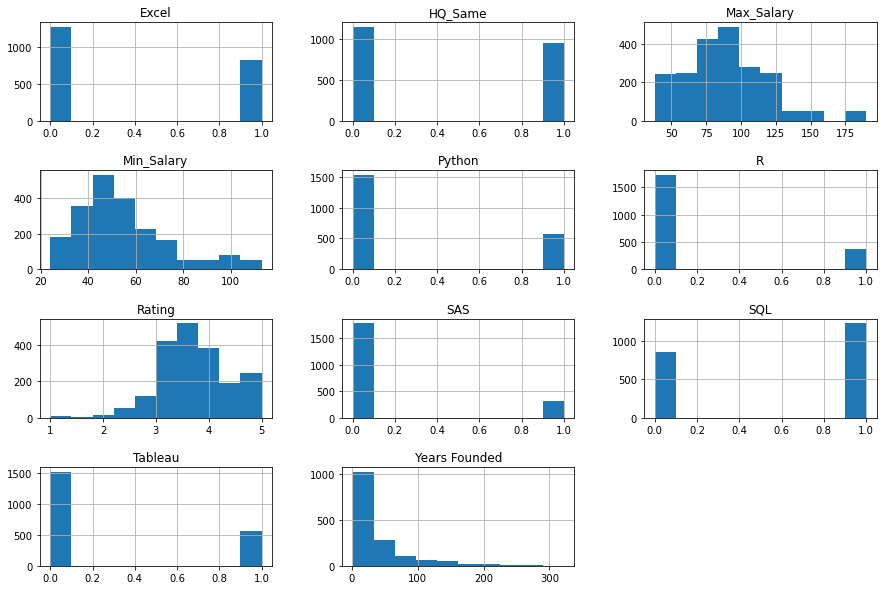

In [10]:
jobs.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

We can see from the distributions above that neither of our targets, Min_Salary and Max_Salary, is normally distributed, and they both have long right tails.  
In terms of skills required, SQL is the only skill that is required by more than 50% of the jobs. 39% of the jobs require experience in Excel, and 27% of the jobs require knowledge in Python.

#### categorical features

In [11]:
#select categorical variables only
df_cat = jobs.select_dtypes(include = 'object').copy()

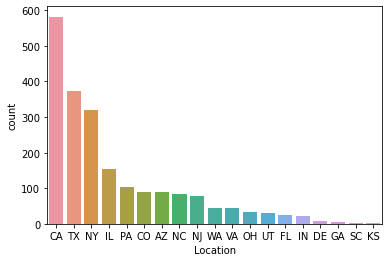

In [12]:
#count plot for 'Location'
location_counts = sns.countplot(x = 'Location', data = df_cat, order = df_cat.Location.value_counts().index)
plt.show()

Seems like there is a great demand for data analysts in the state of California.

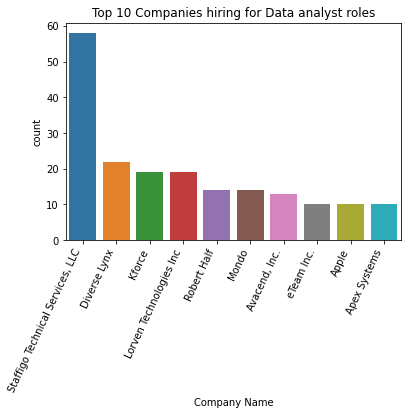

In [13]:
# count plot for 10 of the 'Company Name' that appear the most frequent 
coName_counts = sns.countplot(x = 'Company Name', data = df_cat, 
                              order = df_cat['Company Name'].value_counts().head(10).index)
coName_counts.set_xticklabels(coName_counts.get_xticklabels(), rotation = 65, horizontalalignment='right')
plt.title('Top 10 Companies hiring for Data analyst roles')
plt.show()

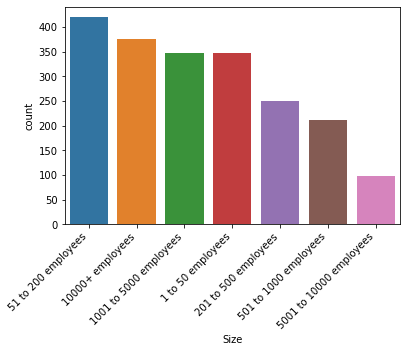

In [14]:
# count plot for 'Size'
size_counts = sns.countplot(x = 'Size', data = df_cat, order = df_cat.Size.value_counts().index)
size_counts = size_counts.set_xticklabels(size_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

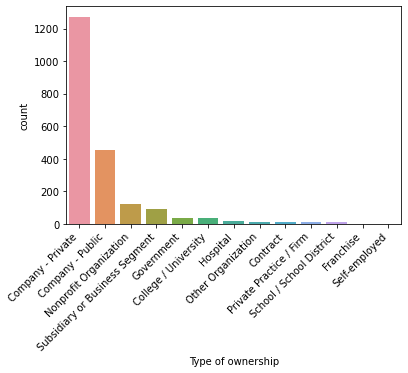

In [15]:
# count plot for 'Type of ownership'
ownership_counts = sns.countplot(x = 'Type of ownership', data = df_cat, order = df_cat['Type of ownership'].value_counts().index)
ownership_counts = ownership_counts.set_xticklabels(ownership_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

Most of the companies that are looking for data analysts are private companies.

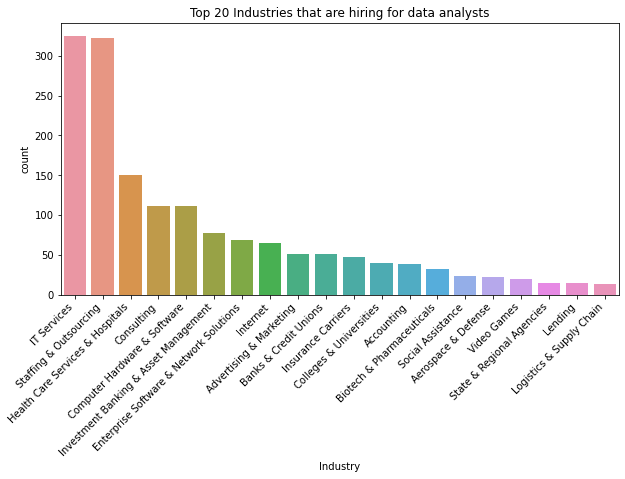

In [16]:
# count plot for the top 20 'Industry'
plt.figure(figsize=(10,5))
industry_counts = sns.countplot(x = 'Industry', data = df_cat, order = df_cat['Industry'].value_counts().head(20).index)
industry_counts = industry_counts.set_xticklabels(industry_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.title('Top 20 Industries that are hiring for data analysts')
plt.show()

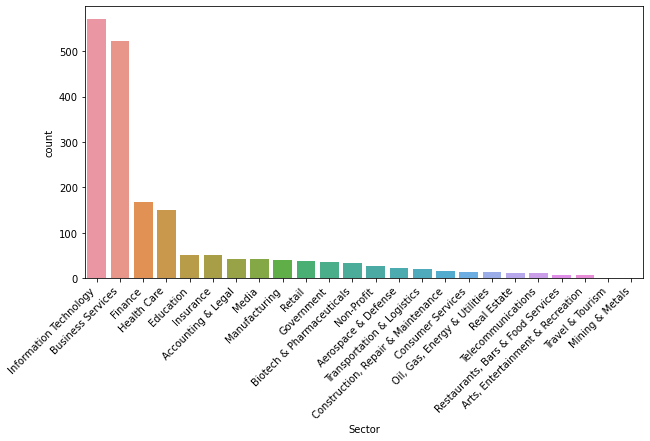

In [17]:
# count plot for 'Sector'
plt.figure(figsize=(10,5))
sector_counts = sns.countplot(x = 'Sector', data = df_cat, order = df_cat['Sector'].value_counts().index)
sector_counts = sector_counts.set_xticklabels(sector_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

Similar to the count plot of Industry, the count plot of Sector shows that IT is the number 1 sector/industry hiring data analysts. Some other top industries/sectors that hire data analysts include staffing & outsourcing, health care,consulting, business services, finance, education, and more.

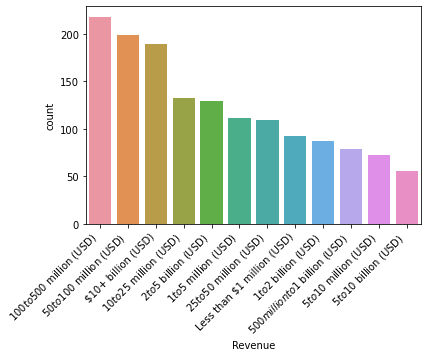

In [18]:
# count plot for 'Revenue'
revenue_counts = sns.countplot(x = 'Revenue', data = df_cat, order = df_cat['Revenue'].value_counts().index)
revenue_counts = revenue_counts.set_xticklabels(revenue_counts.get_xticklabels(), rotation = 45, horizontalalignment='right')
plt.show()

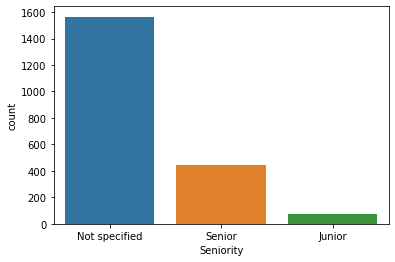

In [19]:
# count plot for 'Seniority'
sr_counts = sns.countplot(x = 'Seniority', data = df_cat, order = df_cat['Seniority'].value_counts().index)
plt.show()

### 2.2. DATA RELATIONSHIPS

#### 2.2.1. Numeric features against salaries

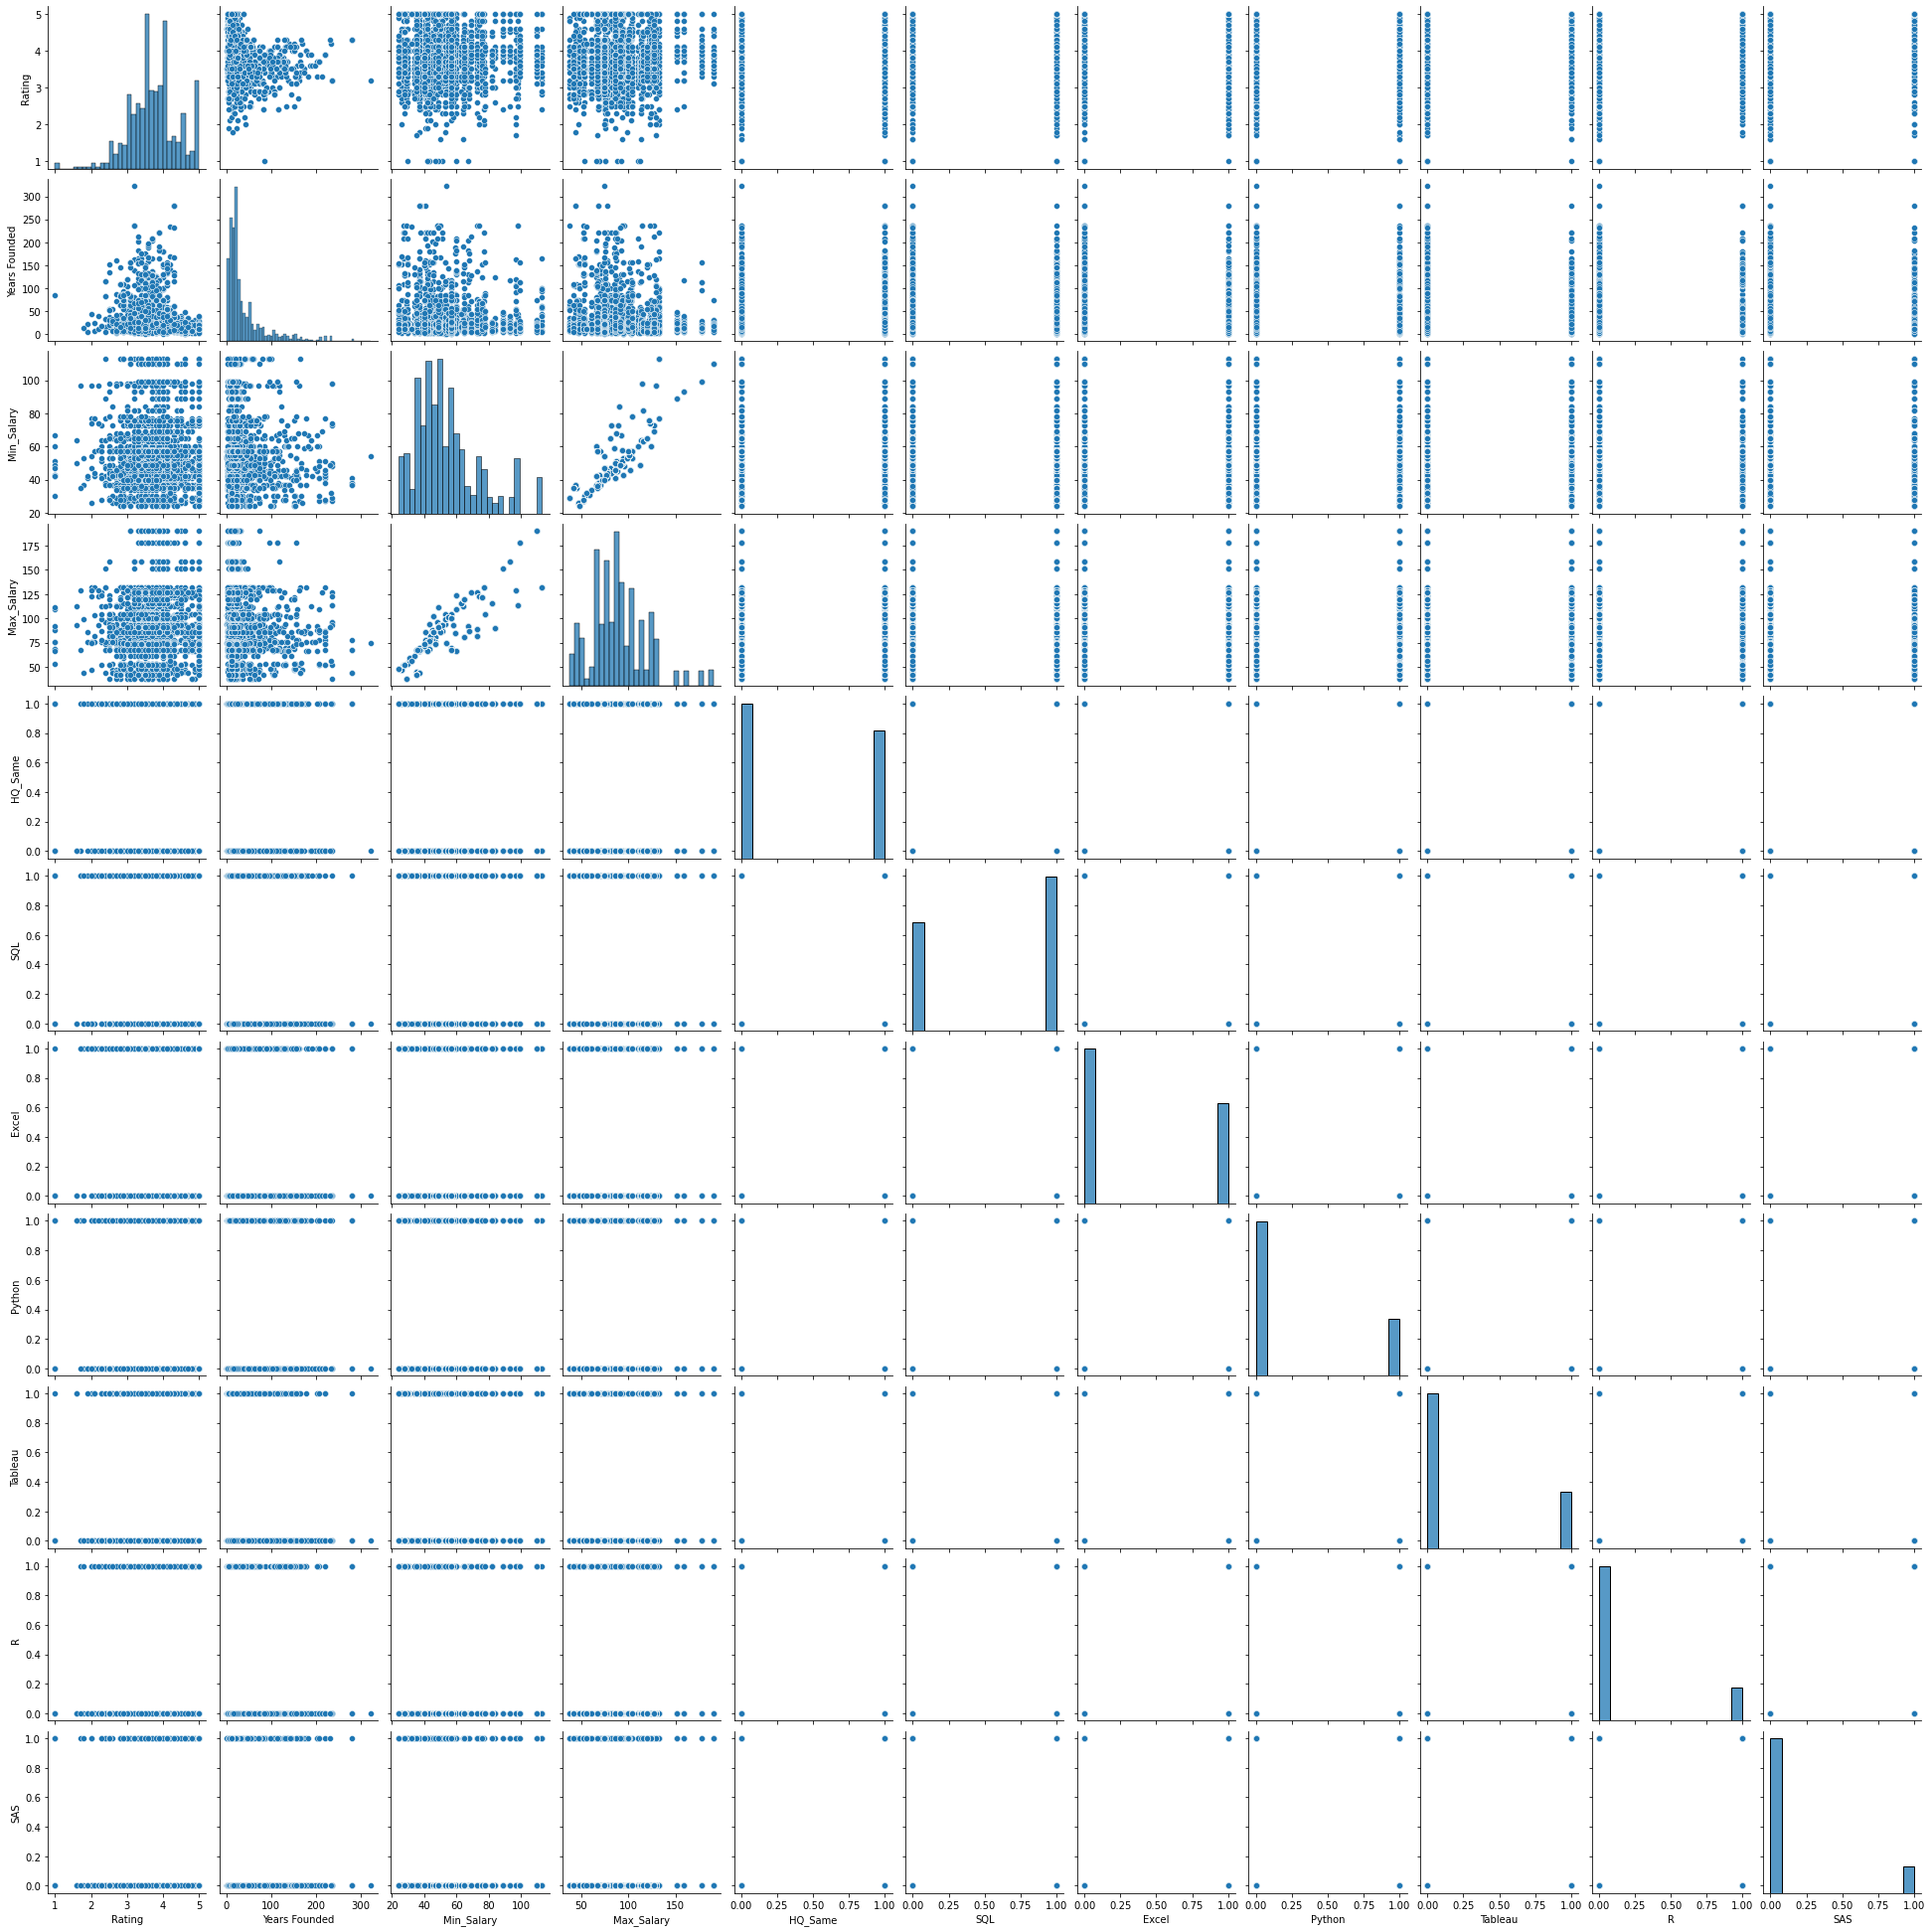

In [20]:
_ = sns.pairplot(data = jobs)
plt.show()

While there are some scatter plots above that are worth taking a look at, there are many others that are not especially helpful in understanding the relationships between particular features. For example, the scatter plots that have HQ_Same and any skills involved would barely give us any useful infomation becuase those features are essentially catergorical even though their variables have numeric values. 

Let's take only the real numeric features this time and plot the pairplot again.

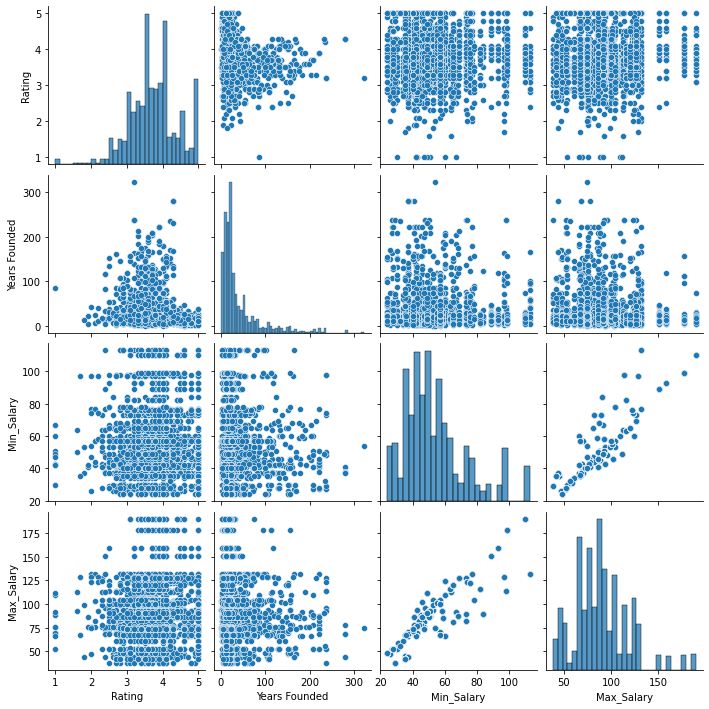

In [21]:
df_numeric = jobs[['Rating','Years Founded','Min_Salary','Max_Salary']].copy()
_ = sns.pairplot(df_numeric)
plt.show()

Not surprisingly, there seems to be a strong linear correlation between Min_Salary and Max_Salary. However, the other scatter plots are more inscrutable.

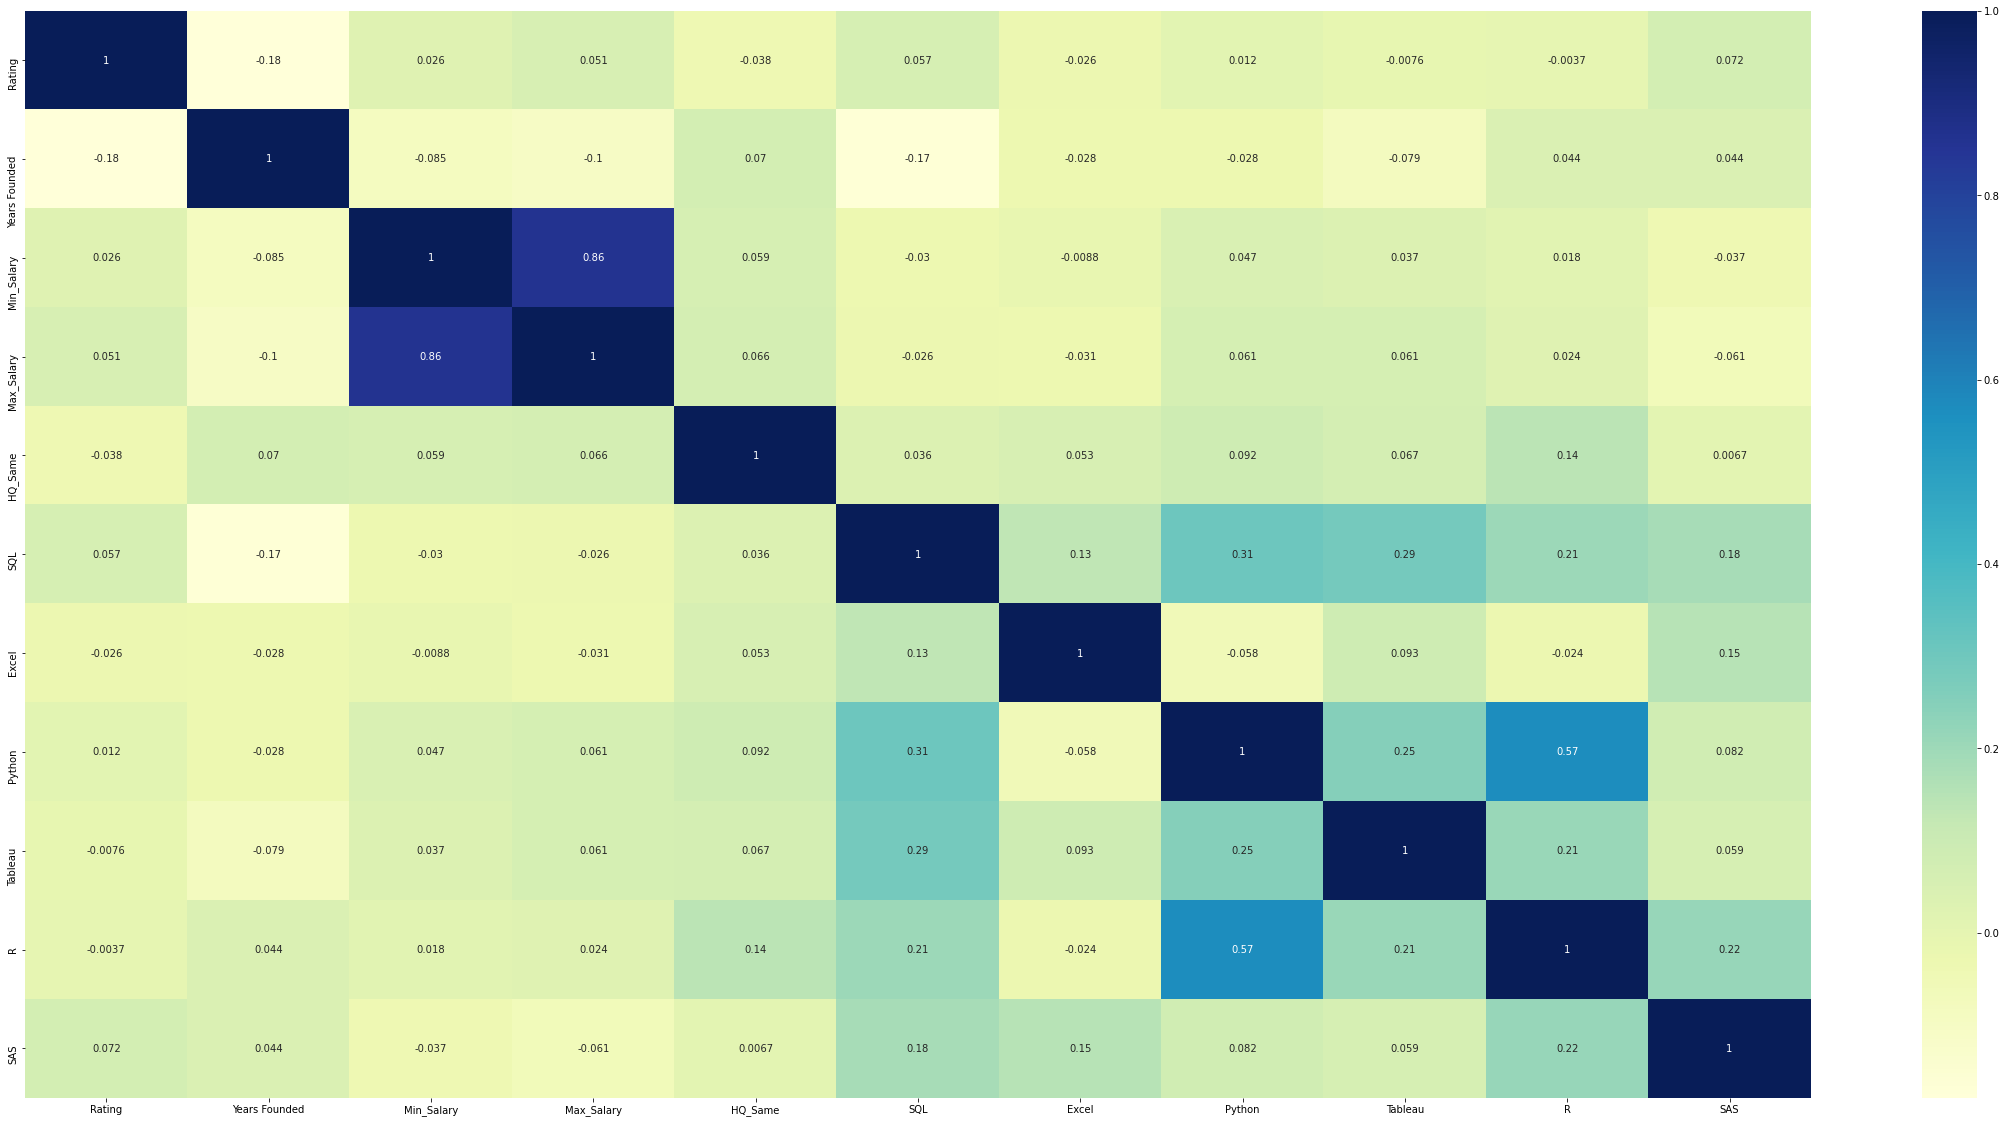

In [22]:
# Make a heatmap of the data 
plt.figure(figsize=(40,20))
sns.heatmap(jobs.corr(),cmap = 'YlGnBu',annot = True) # annotate the graph

Besides the strong positive linear correlation between Min_Salary and Max_Salary, here's a couple things we may want to investigate deeper:  
- Python vs. R
- SQL vs. Python
- SQL vs. Tableu

#### 2.2.2. Categorical features against salaries

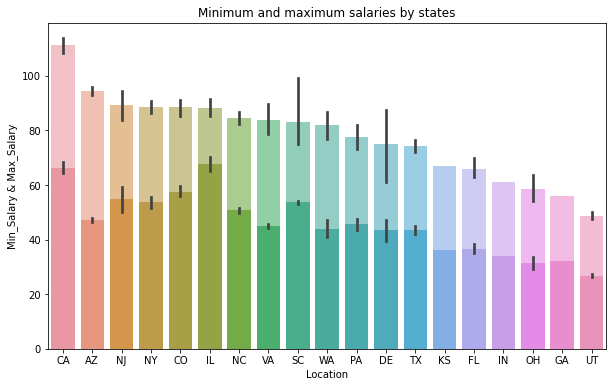

In [77]:
# salaries by locations
df = jobs.groupby('Location')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False)
_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x = 'Location', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Location', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_ = plt.title('Minimum and maximum salaries by states')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

For Data analyst roles, 
- Califonia has the highest maximun salaries and the second highest minimum salaries. 
- Illinois has the highest minimum salaries.
- Delaware has the largest variances in its salaries.
- Utah has both the lowest maximun salaries and the lowest minimum salaries among all states.

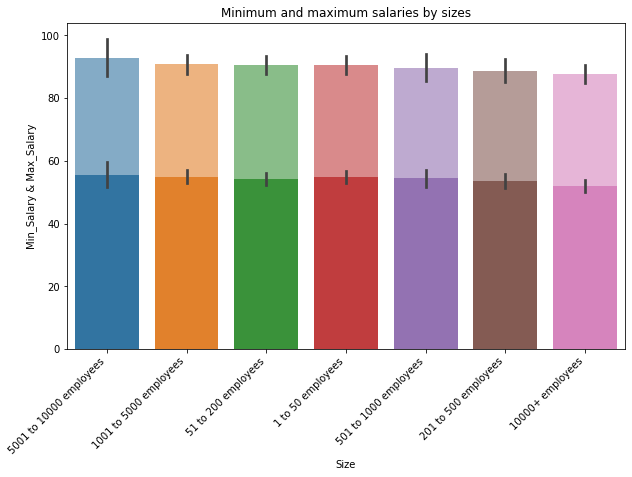

In [94]:
# salaries by sizes
df = jobs.groupby('Size')[['Max_Salary','Min_Salary']].mean().sort_values(['Max_Salary','Min_Salary'],ascending=False).head(20)
_ = plt.figure(figsize=(10,6))
_ = sns.barplot(x = 'Size', y = 'Min_Salary', data = jobs, order = df.index)
_ = sns.barplot(x = 'Size', y = 'Max_Salary', data = jobs, alpha = 0.6, order = df.index)
_.set_xticklabels(_.get_xticklabels(), rotation = 45, horizontalalignment='right')
_ = plt.title('Minimum and maximum salaries by sizes')
_ = plt.ylabel('Min_Salary & Max_Salary')
plt.show()

It seems like salaries depend very little on company sizes.  
However, it's interesting to see that the largest companies(with 10000+ employees) pay the least to data analysts.